# Projet Transformée de Fourier-Bessel (-Hankel) et l'algorthme $\varepsilon$
## Par Antoine Boissinot - - François Gaudreault - - Béatrice Lessard-Hamel
### Présenté à M. Philippe Després

#### Date de remise : 16 avril 2021

In [65]:
#Module
import scipy.special as sp
import matplotlib.pyplot as plt
import numpy as np
import math
import mpmath
from mpmath import *
import timeit

In [66]:
def leibniz(n):
    terms_leibniz = []
    part_sum_leibniz = []
    t_sum = 0
    for i in range(n):
        term = (-1) ** i * 4/(2*i+1)
        terms_leibniz.append(term)
        t_sum = t_sum + term
        part_sum_leibniz.append(t_sum)
  # Erreur relative en pourcentage (pct) selon la valeur de pi de numpy
    err_pi_pct = 100*abs(np.pi - part_sum_leibniz[n-1]) / np.pi    
    
    return terms_leibniz, part_sum_leibniz, err_pi_pct



In [67]:
n = 5000
terms_leibniz, part_sum_leibniz, err_pi = leibniz(n)

In [68]:
print("Somme partielle de la série de Leibniz à {:} termes : {:.10f}".format(n,part_sum_leibniz[-1]))
print("Erreur relative avec la valeur de numpy : {:.10f} %".format(err_pi))

Somme partielle de la série de Leibniz à 5000 termes : 3.1413926536
Erreur relative avec la valeur de numpy : 0.0063661977 %


In [69]:
def ln3(n):
    terms_ln3 = []
    part_sum_ln3 = []
    t_sum = 0
    for i in range(n):
        term = ((-1)**(i)) * 2**(i+1) / (i+1)
        terms_ln3.append(term)
        t_sum = t_sum + term
        part_sum_ln3.append(t_sum)
        
# Erreur relative en pourcentage (pct) selon la valeur de pi de numpy
    err_ln3_pct = 100*abs(np.log(3) - part_sum_ln3[n-1]) / np.log(3)    
    
    return terms_ln3, part_sum_ln3, err_ln3_pct

In [70]:
n = 10
terms_ln3, part_sum_ln3, err_ln3 = ln3(n)

In [71]:
print("Somme partielle de ln3 à {:} termes : {:.10f}".format(n,part_sum_ln3[-1]))
print("Erreur relative avec la fonction de numpy : {:.10f} %".format(err_ln3))

Somme partielle de ln3 à 10 termes : -64.8253968254
Erreur relative avec la fonction de numpy : 6000.6619072127 %


In [72]:
def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier

In [79]:
def dec_counter(par_sum_array, lbound, ubound, dec):
    """
    This function returns the number of terms needed to have the number of true decimals 
    at the value of the sum and that this number of decimals remains true after the number of terms.
    param 1 par_sum_array : Array of the partial sums
    param 2 lbound : lower bound
    param 3 ubound : upper bound
    param 4 dec : number of decimals
    return : index of the term that respects the bounds with the good amount of decimals and that the next term respects them too
    """
    for k in range(len(par_sum_array)):
        if float(par_sum_array[k]) < ubound and float(par_sum_array[k]) > lbound:
            pos = round_down(par_sum_array[k+1],dec)
            value = round_down(par_sum_array[k],dec)
            if pos == value:
                break
    print(k+1)

In [78]:
print(dec_counter(part_sum_leibniz, 3.141, 3.142, 3))

2454
None


In [28]:
def epsilon(terms):
    """
    The function returns the Sum of n terms of a serie with the epsilon algorithm.
    param 1 S: array of terms of a serie with the size n. 
    return: Epsilon matrix, approximation error, More accurate value.   
    """
    n = len(terms)
    e = np.zeros((n + 1, n + 1))
    for i in range(1, n + 1):
        e[i, 1] = terms[i - 1]#All the partial sum 

    for i in range(3, n + 2):
        for j in range(3, i + 1):
            e[i - 1, j - 1] = e[i - 2, j - 3] + 1 / (e[i - 1, j - 2] - e[i - 2, j - 2]) #Epsilon Algo

    mat = e[:, 1:n + 1:2]#Triangular epsilon matrix
    if n>4:
        err_approx = abs(mat[-1,-3]-mat[-1,-1])#Approximation error
    else:
        err_approx = float(nan)
    return mat,err_approx,mat[-1,-1]


In [29]:
def compute(n0,nmax,func):
    """
    The function returns all the important output compute with the partial sumation and the epsilon algorithm..
    param:  n0: Lower bound nonzero n terms. 
            nmax:Upper bound of n terms.
            func: Summation function.
    return: n: number of terms
            terms: terms of the serie.
            sp, sp_err: Partial sum and partial sum absolute error.
            epsi, epsi_err: Sum compute with epsilon and the absolute error.
            epsi_err_approx: Approximative error 
    """
    n = []
    sp = []
    sp_err =[]
    terms = []
    epsi = []
    epsi_err =[]
    epsi_err_approx = []
    for N in range(n0,nmax):    
        term, s, err= func(N)
        terms.append(term) #List of N terms of the serie
        sp_err.append(err) #List of N absolute error of the partial sum
        sp.append(s[N-1]) #List of N partial sum of the serie
        if N >3:
            mat,err_approx,best= epsilon(s)
        else:
            err_approx = float(nan)
            best = float(nan)
        epsi_err_approx.append(err_approx) #List of N approx error
        epsi.append(best)#List of N best acurate value with epsilon algo
        a = 100*abs(np.pi - best) / np.pi 
        epsi_err.append(a)#List of N absolute error with epsilon algo
        n.append(N)
    return n,terms[-1],[sp,sp_err],[epsi,epsi_err],epsi_err_approx,mat
    

## Graphiques des sommes partielles en fonction du nombre de terme.

/Users/beatricelessard-hamel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/beatricelessard-hamel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


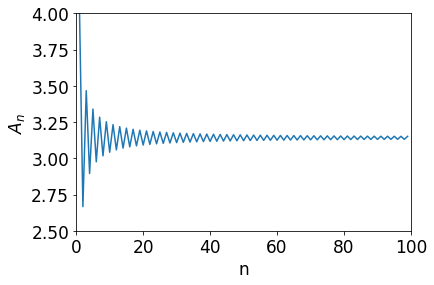

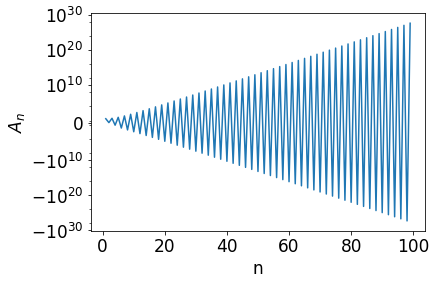

In [51]:
Leb = compute(1,100,leibniz)
ln = compute(1,100,ln3)

plt.rcParams.update({'font.size': 17})
params = {'legend.fontsize': 10,
          'legend.handlelength': 2}
plt.rcParams.update(params)

plt.plot(Leb[0],Leb[2][0])
plt.ylabel('$A_n$')
plt.xlabel('n')
plt.ylim(2.5,4)
plt.xlim(0,100)
plt.show()

plt.plot(ln[0],ln[2][0])
plt.yscale("symlog")
plt.ylabel('$A_n$')
plt.xlabel('n')
plt.yticks([-10e29,-10e19,-10e9,0,10e9,10e19,10e29])
plt.show()

À noter que l'erreur de division par 0 est causé par la soustraction dans l'algorithme Epsilon. Autour de 40 termes, les valeurs (i - 1, j - 2) et (i - 2, j - 2) sont les mêmes.

## Graphique de l'erreur approximative en fonction du nombre de terme.

/Users/beatricelessard-hamel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/beatricelessard-hamel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


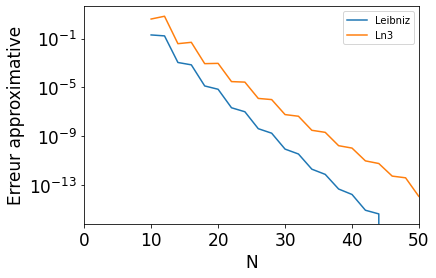

In [52]:
Leb2 = compute(1,50,leibniz)
ln2 = compute(1,50,ln3)

N = np.array(Leb2[0])*2
plt.plot(N, Leb2[4],label='Leibniz')
plt.plot(N, ln2[4],label='Ln3')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel("Erreur approximative")
plt.legend()
plt.xlim(0,50)
plt.show()

## Graphique de l'erreur relative en fonction du nombre de terme.

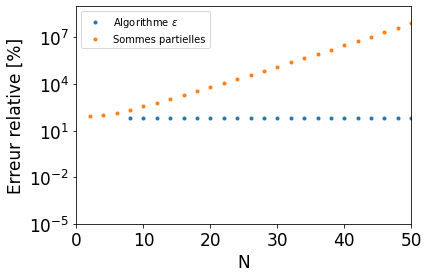

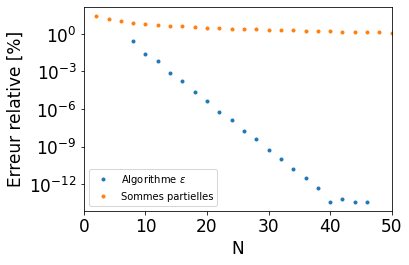

In [53]:
plt.plot(N,ln2[3][1],'.', label = 'Algorithme $\epsilon$')
plt.plot(N,ln2[2][1],'.',label = 'Sommes partielles')
plt.legend()
plt.ylim(10e-6,10e8)
plt.xlim(0,50)
plt.ylabel('Erreur relative [%]')
plt.xlabel('N')
plt.yscale("log")
plt.show()

plt.plot(N,Leb2[3][1],'.', label = 'Algorithme $\epsilon$')
plt.plot(N,Leb2[2][1],'.',label = 'Sommes partielles')
plt.ylabel('Erreur relative [%]')
plt.xlabel('N')
plt.yscale("log")
plt.xlim(0,50)
plt.tight_layout()
plt.legend()
plt.show()


## Comparaison de notre algorithme Epsilon avec le module mpmath pour 20 valeurs.  

In [50]:
K = 20
S = [4*sum(mpf(-1)**n/(2*n+1) for n in range(m)) for m in range(1,K)]
T = shanks(S)
test = compute(3, K, leibniz)
print("Valeur obtenue avec mpmath: {:}".format(float(T[-1][-1])))
print("Valeur obtenue avec notre algorithme epsilon: {:}".format(test[3][0][-1]))

t1 = timeit.timeit('[epsilon(T[1])]', number=1,globals=globals())
t2 = timeit.timeit('[shanks(S)]', number=1,globals=globals())
print("L'algorithme Epsilon est {:.2f} fois plus rapide que le module mpmath.".format(t2/t1))

Valeur obtenue avec mpmath: 3.1415926535898095
Valeur obtenue avec notre algorithme epsilon: 3.1415926535898095
L'algorithme Epsilon est 69.95 fois plus rapide que le module mpmath.


In [62]:
def simpson(func, a, b, N):
    """
    Integration by Simpson method
    param 1 func: func is the function to integrate 
    param 2 a: a is the lower boundary of the integral 
    param 3 b: b is the upper boundary of the integral  
    param 4 N: N is the number of slic
    return: I, the integration of the function   
    """
    h = abs(b - a) / N  # Size of the slices 
    x = np.linspace(a, b, N+1) #N+1 points in the interval [a,b]
    y = func(x)
    
    y_odd = y[1:-1:2] #Sum of odd 
    s1 = np.sum(y_odd)
    
    y_even = y[2:-2:2] #Sum of even
    s2 = np.sum(y_even)
    
    I = h/3*(y[0] + y[-1] + s1*4+s2*2) #Area under the curve 
    
    return I 
    
def Hankel_transform(func, p, n, L):
    """
    Parameters
    ----------
    g : function that receives one argument and returns one 
        g the function to transform
    p :The p value in the Fourrier-Bessel space 
    n : integer
        The order of the Bessel function of the first kind.
    L : The number of term for the partial sum 
    Returns
    -------
    The partial sum L of the hankel transform of the function func 
    """
    zeros = sp.jn_zeros(n, L+1) # array of the L+1 first zeros of bessel order n  
    value = 0 #Initialize the value 
    partial_sums = []
    #function to integrate
    def f(x):
        return x*func(x/p)/p**2 * sp.jv(n, x) 
    
    for i in range(L):
       I = simpson(f, zeros[i], zeros[i+1], 1000)
       value += I
       partial_sums.append(I)
    test = epsilon(partial_sums,L)
    return value, partial_sums,test

def f1(x): 
    return x
p = 1
n = 0 
L = 20

p_value, partial_sums, test = Hankel_transform(f1, p, n, L)
print(test)
# x = np.arange(1, len(partial_sums)+1)
# plt.plot(x, partial_sums)
# plt.show()

8.410485248495526e-14


In [40]:
leibnizS = lambda i: (-1) ** i * 4/(2*i+1)
ln3S = lambda i: ((-1)**(i)) * 2**(i+1) / (i+1)

print(epsilon(ln3S,20))
# leibniz_epsi = np.zeros(49)

# for n in  range(2,50):
#     print(n)
#     leibniz_epsi[n-1] = epsilon(leibnizS,n)
    
# N = range(1,50)
    
# print(leibniz_epsi,n)

1.0986122886598162
